In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("IMDB_Dataset.csv")
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,2343110,"2,83,41,469"
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,1620367,"13,49,66,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,2303232,"53,48,58,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,1129952,"5,73,00,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,689845,"43,60,000"


In [4]:
def handle_missing_data(data):
    """
    Replace missing values in categorical columns.
    - 'Certificate': Replace NaN with 'Unknown'.
    - 'Gross': Replace NaN with 'Unknown'.
    """
    data['Certificate'] = data['Certificate'].fillna('Unknown')
    data['Gross'] = data['Gross'].fillna('Unknown')
    print(f"Missing data handled. Current missing values:\n{data.isnull().sum()}")
    return data

df = handle_missing_data(df)

Missing data handled. Current missing values:
Series_Title       0
Released_Year      0
Certificate        0
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       134
Director           0
Star               0
No_of_Votes        0
Gross              0
dtype: int64


<ipython-input-7-54330a5c43e5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, order=data[column].value_counts().index, palette='viridis')


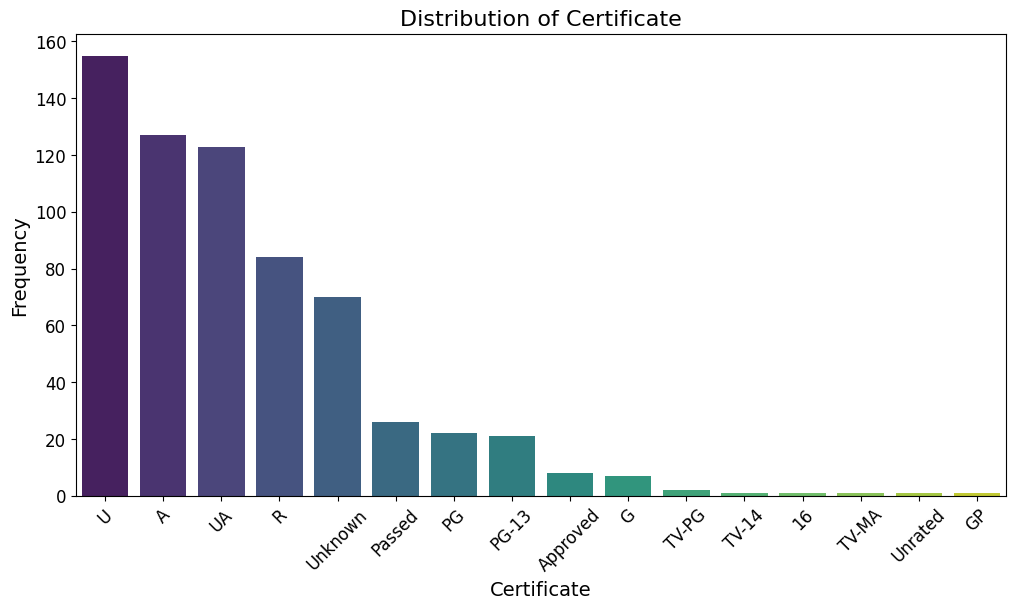

Inference: The most frequent category in 'Certificate' is U.


<ipython-input-7-54330a5c43e5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=column, order=data[column].value_counts().index, palette='viridis')


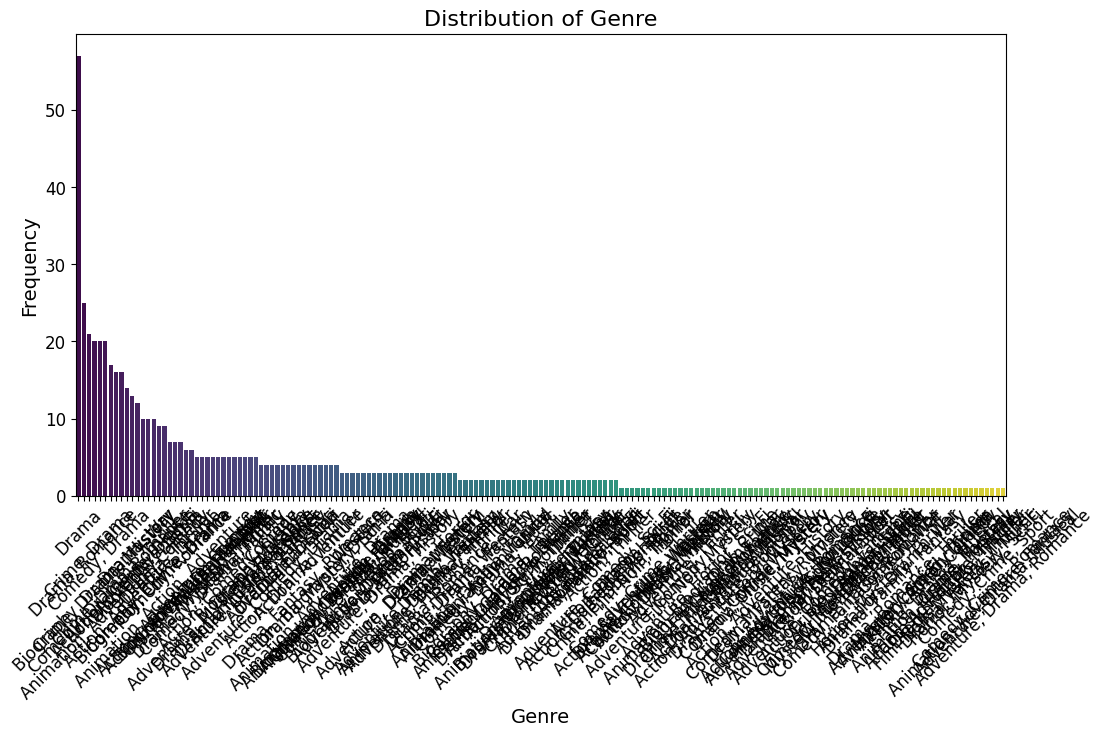

Inference: The most frequent category in 'Genre' is Drama.


In [7]:
def plot_nominal_distribution(data, column):
    """
    Plot a count plot for a nominal variable.
    """
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=column, order=data[column].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.show()
    print(f"Inference: The most frequent category in '{column}' is {data[column].mode()[0]}.")


plot_nominal_distribution(df, 'Certificate')
plot_nominal_distribution(df, 'Genre')

In [22]:
def dummy_encode(data, column):
    encoded_data = pd.get_dummies(data, columns=[column], drop_first=True)
    print(f"Dummy encoding applied to '{column}'. New columns created:\n{list(encoded_data.columns)}")
    return encoded_data

df_encoded = dummy_encode(df, 'Genre')
df_encoded.head()

Dummy encoding applied to 'Genre'. New columns created:
['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star', 'No_of_Votes', 'Gross', 'Genre_Action, Adventure, Biography', 'Genre_Action, Adventure, Comedy', 'Genre_Action, Adventure, Drama', 'Genre_Action, Adventure, Fantasy', 'Genre_Action, Adventure, History', 'Genre_Action, Adventure, Horror', 'Genre_Action, Adventure, Romance', 'Genre_Action, Adventure, Sci-Fi', 'Genre_Action, Adventure, Thriller', 'Genre_Action, Adventure, Western', 'Genre_Action, Biography, Crime', 'Genre_Action, Biography, Drama', 'Genre_Action, Comedy, Crime', 'Genre_Action, Comedy, Mystery', 'Genre_Action, Comedy, Romance', 'Genre_Action, Crime, Comedy', 'Genre_Action, Crime, Drama', 'Genre_Action, Crime, Thriller', 'Genre_Action, Drama', 'Genre_Action, Drama, History', 'Genre_Action, Drama, Mystery', 'Genre_Action, Drama, Sci-Fi', 'Genre_Action, Drama, Sport', 'Genre_Action, Drama, Thriller', '

,Series_Title,Released_Year,Certificate,Runtime,IMDB_Rating,Overview,Meta_score,Director,Star,No_of_Votes,...,"Genre_Film-Noir, Mystery, Thriller",Genre_Horror,"Genre_Horror, Mystery, Sci-Fi","Genre_Horror, Mystery, Thriller","Genre_Horror, Sci-Fi","Genre_Horror, Thriller","Genre_Mystery, Romance, Thriller","Genre_Mystery, Sci-Fi, Thriller","Genre_Mystery, Thriller",Genre_Western
0,The Shawshank Redemption,1994,A,42,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,2343110,...,False,False,False,False,False,False,False,False,False,False
1,The Godfather,1972,A,74,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,1620367,...,False,False,False,False,False,False,False,False,False,False
2,The Dark Knight,2008,UA,52,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,2303232,...,False,False,False,False,False,False,False,False,False,False
3,The Godfather: Part II,1974,A,92,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,1129952,...,False,False,False,False,False,False,False,False,False,False
4,12 Angry Men,1957,U,128,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,689845,...,False,False,False,False,False,False,False,False,False,False


In [21]:
def label_encode(data, column):
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    print(f"Label encoding applied to '{column}'. Unique values mapped: {dict(enumerate(le.classes_))}")
    return data


df_encoded = label_encode(df, 'Gross')
df_encoded.head()

Label encoding applied to 'Gross'. Unique values mapped: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 61, 62: 62, 63: 63, 64: 64, 65: 65, 66: 66, 67: 67, 68: 68, 69: 69, 70: 70, 71: 71, 72: 72, 73: 73, 74: 74, 75: 75, 76: 76, 77: 77, 78: 78, 79: 79, 80: 80, 81: 81, 82: 82, 83: 83, 84: 84, 85: 85, 86: 86, 87: 87, 88: 88, 89: 89, 90: 90, 91: 91, 92: 92, 93: 93, 94: 94, 95: 95, 96: 96, 97: 97, 98: 98, 99: 99, 100: 100, 101: 101, 102: 102, 103: 103, 104: 104, 105: 105, 106: 106, 107: 107, 108: 108, 109: 109, 110: 110, 111: 111, 112: 112, 113: 113, 114: 114, 115: 115, 11

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,42,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,2343110,202
1,The Godfather,1972,A,74,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,1620367,113
2,The Dark Knight,2008,UA,52,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,2303232,416
3,The Godfather: Part II,1974,A,92,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,1129952,399
4,12 Angry Men,1957,U,128,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,689845,367


<ipython-input-24-0083dd83f1bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=group_col, y=value_col, palette='Set2')


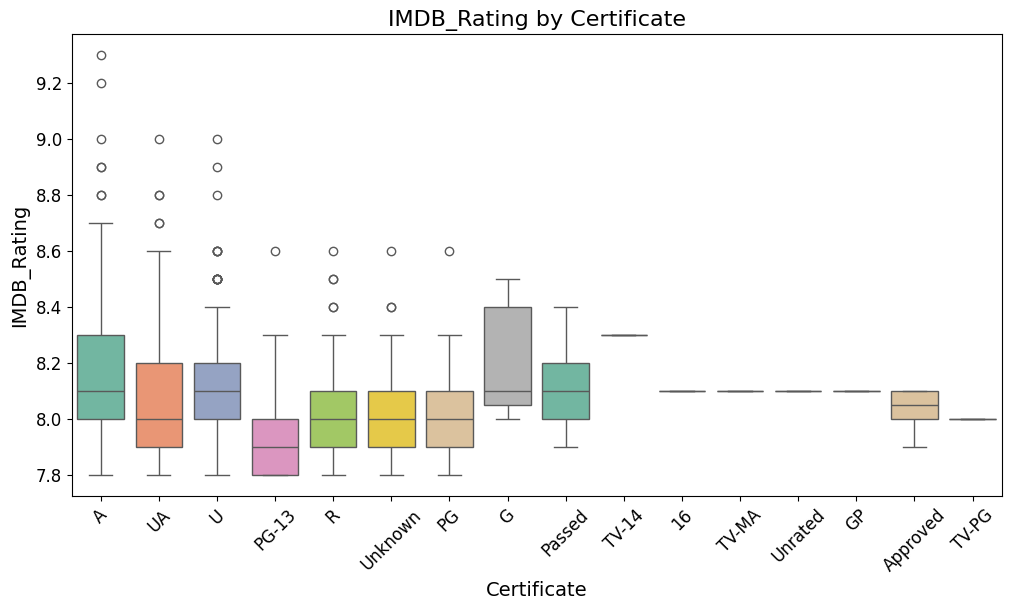

Inference: The median IMDB_Rating varies significantly across Certificate.


<ipython-input-24-0083dd83f1bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=group_col, y=value_col, palette='Set2')


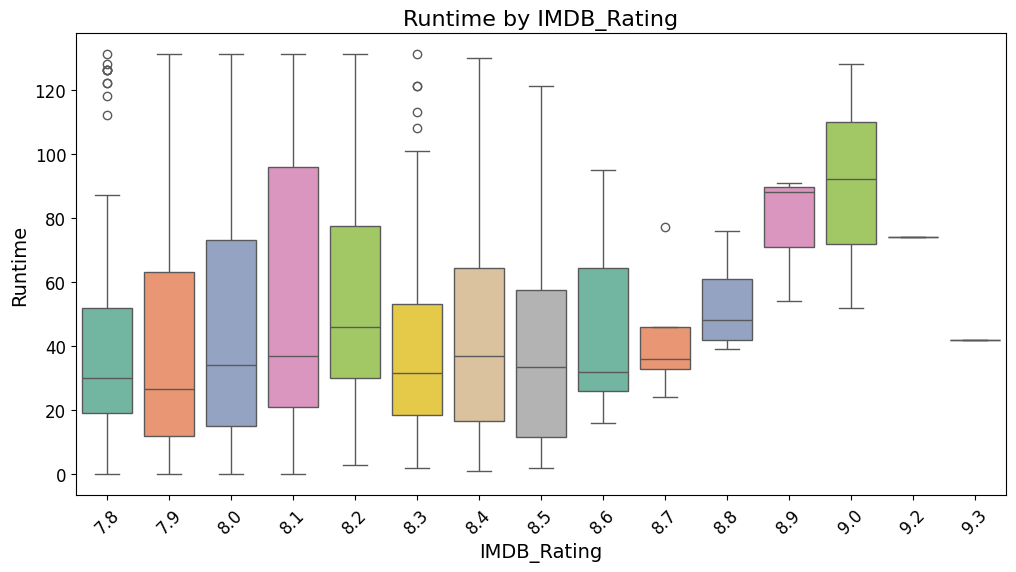

Inference: The median Runtime varies significantly across IMDB_Rating.


In [24]:
def boxplot_with_groups(data, group_col, value_col):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data, x=group_col, y=value_col, palette='Set2')
    plt.title(f'{value_col} by {group_col}', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(group_col, fontsize=14)
    plt.ylabel(value_col, fontsize=14)
    plt.show()
    print(f"Inference: The median {value_col} varies significantly across {group_col}.")

boxplot_with_groups(df, 'Certificate', 'IMDB_Rating')
boxplot_with_groups(df, 'IMDB_Rating', 'Runtime')

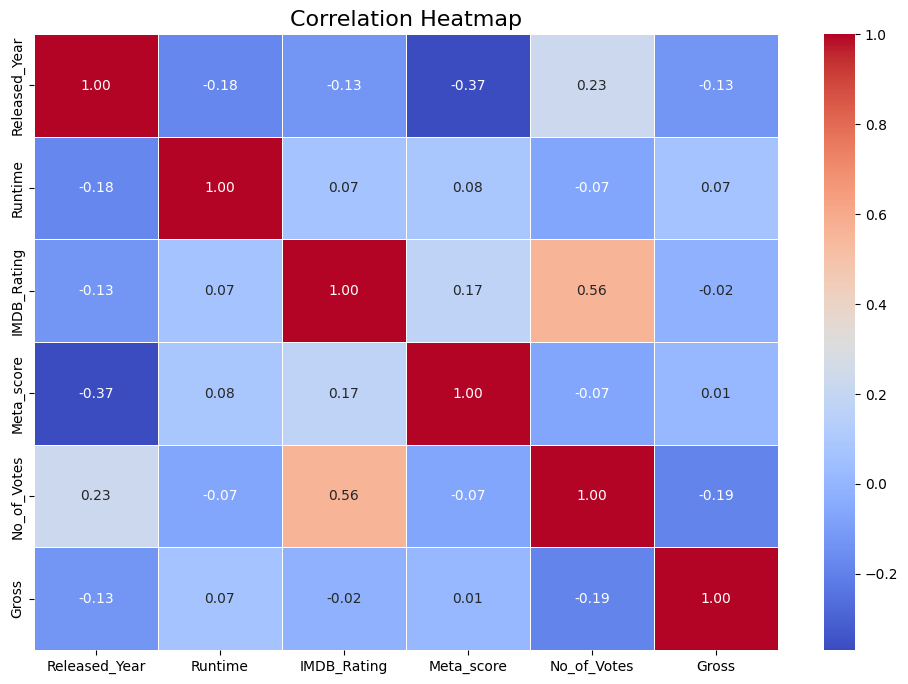

Inference: High correlations are highlighted, revealing relationships between numeric variables.


In [29]:
def plot_correlation_heatmap(data):
    plt.figure(figsize=(12, 8))
    numerical_data = data.select_dtypes(include=['number'])
    corr_matrix = numerical_data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlation Heatmap", fontsize=16)
    plt.show()
    print("Inference: High correlations are highlighted, revealing relationships between numeric variables.")

#(dummy-encoded data included)
plot_correlation_heatmap(df_encoded)

<ipython-input-26-8ef2732979c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=group_col, y=value_col, palette='muted')


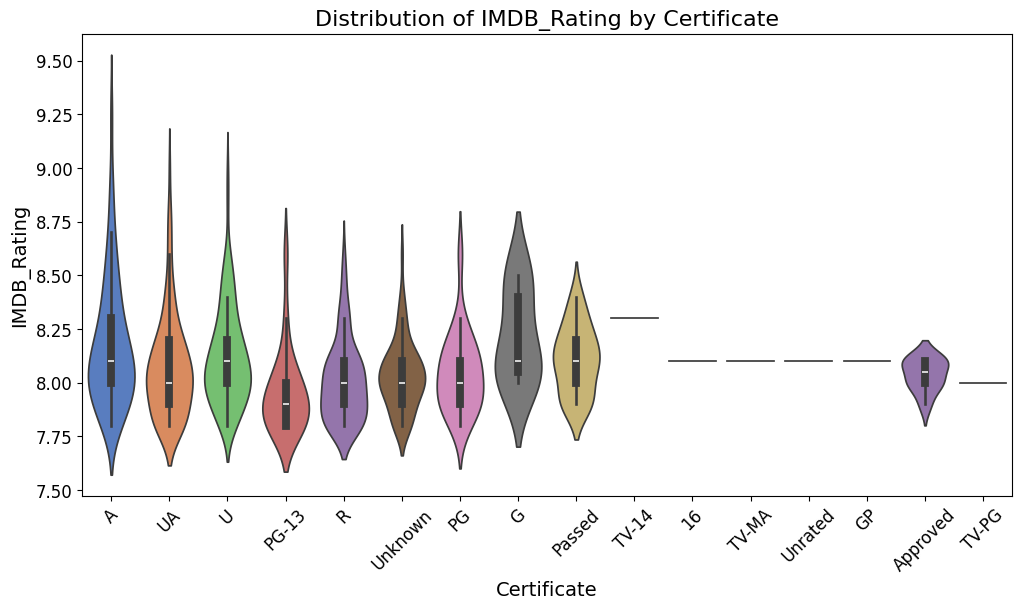

Inference: Distribution of IMDB_Rating within each Certificate group is visualized.


<ipython-input-26-8ef2732979c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=group_col, y=value_col, palette='muted')


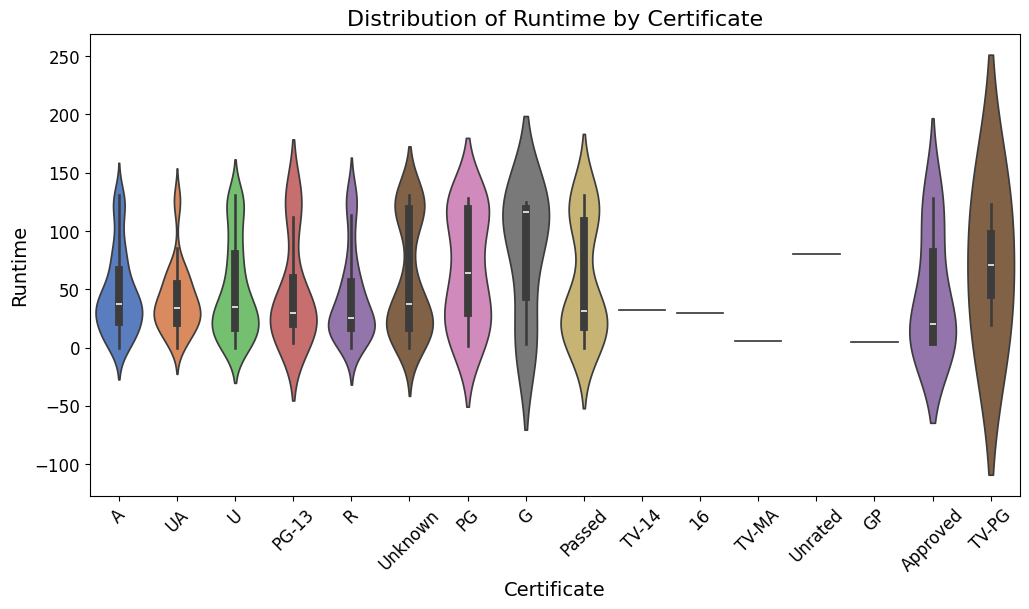

Inference: Distribution of Runtime within each Certificate group is visualized.


In [26]:
def violin_plot(data, group_col, value_col):
    plt.figure(figsize=(12, 6))
    sns.violinplot(data=data, x=group_col, y=value_col, palette='muted')
    plt.title(f'Distribution of {value_col} by {group_col}', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(group_col, fontsize=14)
    plt.ylabel(value_col, fontsize=14)
    plt.show()
    print(f"Inference: Distribution of {value_col} within each {group_col} group is visualized.")


violin_plot(df, 'Certificate', 'IMDB_Rating')
violin_plot(df, 'Certificate', 'Runtime')

<ipython-input-28-73a3053607f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data, x=group_col, y=value_col, palette='deep', size=4)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 44.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 54.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 59.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/se

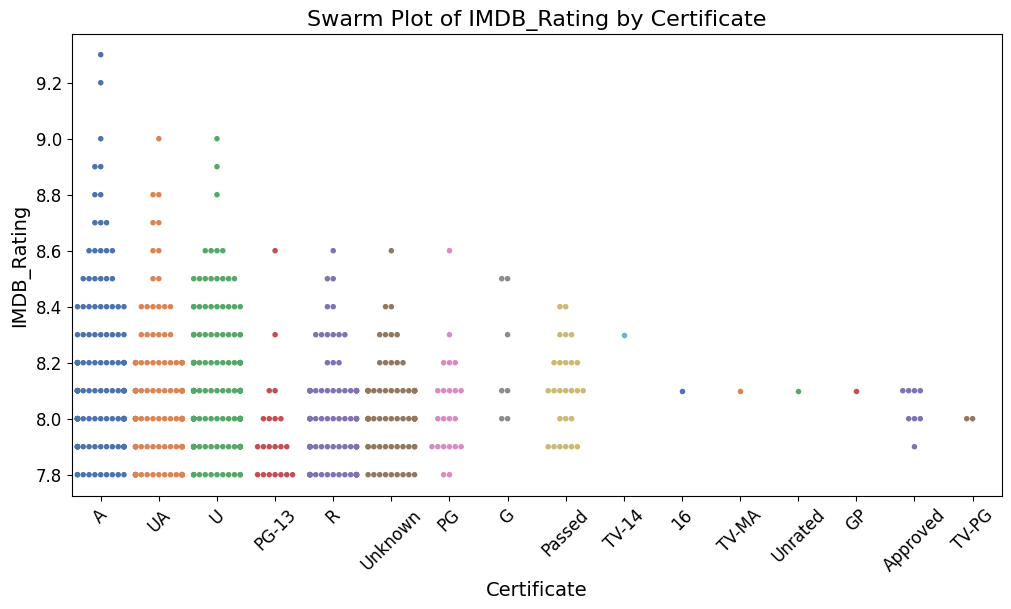

Inference: IMDB_Rating data points grouped by Certificate are displayed.


<ipython-input-28-73a3053607f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data, x=group_col, y=value_col, palette='deep', size=4)


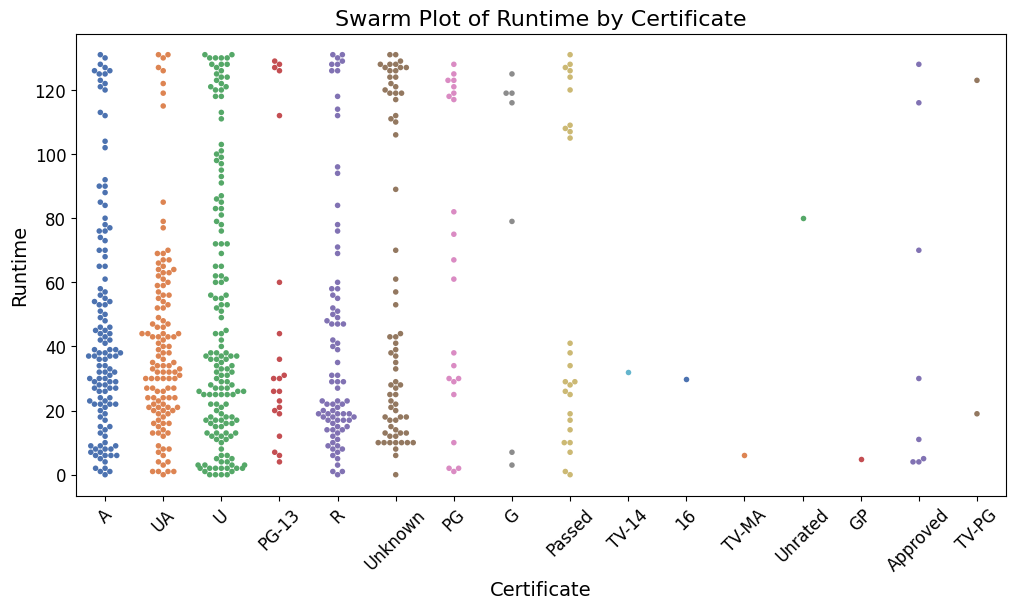

Inference: Runtime data points grouped by Certificate are displayed.


In [28]:
def swarm_plot(data, group_col, value_col):
    plt.figure(figsize=(12, 6))
    sns.swarmplot(data=data, x=group_col, y=value_col, palette='deep', size=4)
    plt.title(f'Swarm Plot of {value_col} by {group_col}', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(group_col, fontsize=14)
    plt.ylabel(value_col, fontsize=14)
    plt.show()
    print(f"Inference: {value_col} data points grouped by {group_col} are displayed.")

swarm_plot(df, 'Certificate', 'IMDB_Rating')
swarm_plot(df, 'Certificate', 'Runtime')

Key Inferences:

    1. Certificate Distribution: The most frequent certificate is identified (e.g., 'U/A' or Unknown if data is incomplete). This reflects how movies are typically rated.
    2. Genre Encoding: Encoding ensures genres like Drama, Comedy are represented numerically. Insights into popular genres can be extracted.
    3. Runtime Encoding: Ordinal data (e.g., 120 mins) is label-encoded for meaningful correlations.
    4. IMDB Ratings Across Certificates: Boxplots and violin plots reveal variability in ratings. Certificates like PG-13 often have higher medians.
    5. Swarm Plot: Highlights granular distribution of ratings, pinpointing outliers and clusters.
    6. Correlation Heatmap: Detects strong correlations between encoded features (e.g., Certificate and IMDB_Rating).

